In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Допустим, мы хотим спрогнозировать, сколько раз стрелок в тире попадет в цель за минуту

Определим следующий параметры:

* length - Длина ствола в мм (не влияет на результат, большие значения)
* accuracy - Точность оружия (вероятность попасть в цель)
* rate - Скорострельность в минуту
* weight - Вес оружия (не влияет на результат, маленькие значения)

* score - Количество попаданий

Получается, стрелок попадет accuracy * rate раз

Создаем сэмпл:

In [2]:
n_samples = 1000

length = np.random.choice(500, n_samples) + 100
accuracy = np.random.choice(90, n_samples) + 10
rate = np.random.choice(100, n_samples) + 1
weight = np.random.choice(40, n_samples)/40 + 1

score = accuracy * rate

data = pd.DataFrame({'length': length, 'accuracy': accuracy, 'rate': rate, 'weight': weight, 'score': score})
data.head(5)

,length,accuracy,rate,weight,score
0,475,30,33,1.250,990
1,594,38,34,1.275,1292
2,195,99,36,1.475,3564
3,403,28,43,1.425,1204
4,547,19,55,1.100,1045


Обучаем модель по всем столбцам и проверяем ее качество:

In [3]:
X = data[['length', 'accuracy', 'rate', 'weight']]
y = data['score']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'accuracy', 'rate', 'weight']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  0.16083525  50.99212183  55.27636868 -27.80209113]
Bias: -2839.5100051783447
Error: 568.4675603550555


Характерно, что мусорный столбец weight с низкими значениями получил высокий коэффициент, а мусорный столбец length с высокими значениями - низкий коэффициент 

Смотрим корреляцию параметров друг с другом и с целевой переменной:

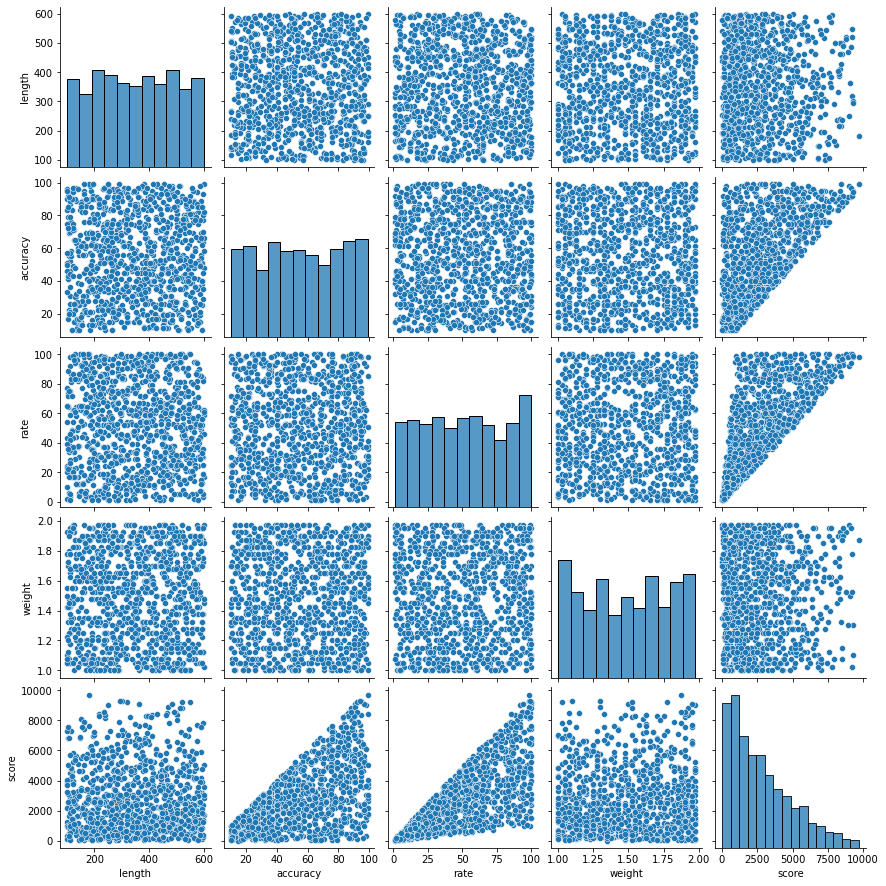

In [4]:
sns.pairplot(data)

На визуализации видно, что целевая слабо (или вообще никак) не коррелирует с параметрами length и weight

Для каждого такого параметра делаем проверку - убираем из модели и проверяем, понизилось ли ее качество. Если качество не понизилось - значит столбец мусорный, и мы можем смело его убирать:

In [5]:
X = data[['accuracy', 'rate', 'weight']]
y = data['score']

pred_values = LinearRegression().fit(X, y).predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Error: 568.227870119683


In [6]:
X = data[['length', 'accuracy', 'rate']]
y = data['score']

pred_values = LinearRegression().fit(X, y).predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Error: 568.5763472061402


In [7]:
X = data[['accuracy', 'rate']]
y = data['score']

pred_values = LinearRegression().fit(X, y).predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Error: 568.2730920948537


In [8]:
data['ACCxRATE'] = data['accuracy'] * data['rate']

X = data[['ACCxRATE']]
y = data['score']

pred_values = LinearRegression().fit(X, y).predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Error: 0.0


Даже если оставить все остальные колонки, включая мусорные, коэффициент у них будет околонулевой, а результат достаточно точен:

In [9]:
X = data[['ACCxRATE', 'length', 'accuracy', 'rate', 'weight']]
y = data['score']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 1.00000000e+00  1.56743503e-17 -5.21050848e-16 -5.84802788e-16
 -1.00687822e-14]
Bias: 4.547473508864641e-13
Error: 1.8966694881328294e-13
